# LAB | Probability distributions

## Import libraries here

In [1]:
# Libraries
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

### Generate samples and test normal distribution.
- Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.
- Read the documentation for `scipy.stats.norm.rvs` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The function will help you create the normal random samples.

In [2]:
# Your code here

In [3]:
mu = 50
sigma = 5
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [stats.norm.rvs(mu, sigma, size) for size in sample_size]

### Plot normal distributions.
- To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 
- Your output should look like the figure below:

![normal distributions with different sample sizes](images/ch-1.png)

In [4]:
# Your code here

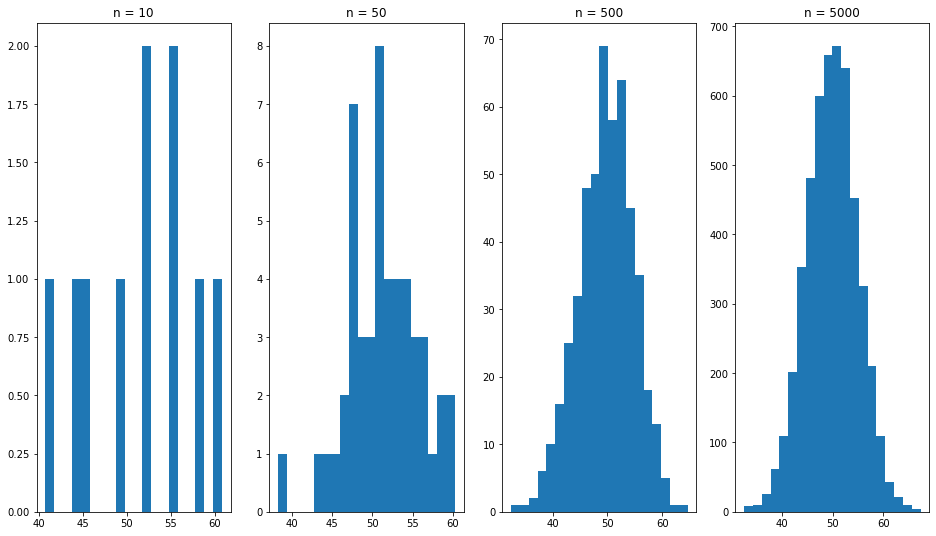

In [5]:
# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize = (16,9))

# Plot each histogram
for i in range(4):
    axes[i].set_title('n = ' + str(sample_size[i]))
    axes[i].hist(dists[i], 20)

#### Compare the distributions above
- What do you observe? Explain with the Central Limit Theorem.

In [6]:
# Your answer here

`Comments:`

As the sample size increases, we see that the distribution more closely approximates a normal distribution 
around the mean, as is stated by the CLT.

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

- We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

####  Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.
```python
stats.binom(n, p)
```

In [7]:
# Your code here

In [8]:
# Variables 
n = 5
p = 0.15
x = range(n)

# Binomial distribution
dist = stats.binom(n, p)

#### Plot the PMF of the distribution. 
- Your output should look like the figure below:

![binom 10](images/ch-2.png)

In [9]:
# Your code here

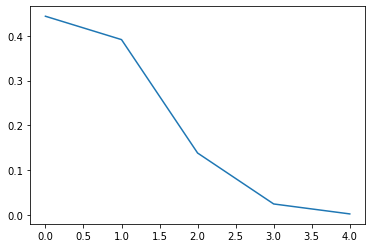

In [10]:
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above.

In [11]:
# Your answer here

`Comments:`

The plot shows the probability mass function for a discrete random variable.<br/>
We see there are only lines at whole numbers (discrete) and that the probability values sum to 1.

The plot also shows that the probability that a given number of people clicks an ad decreases as the number of people that have to click increases. 

#### Now plot PMF with 50, 500, and 5000 visitors.
- To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.
- Your output should look like the figure below:
![prf](images/ch-2b.png)

In [12]:
# Your code here

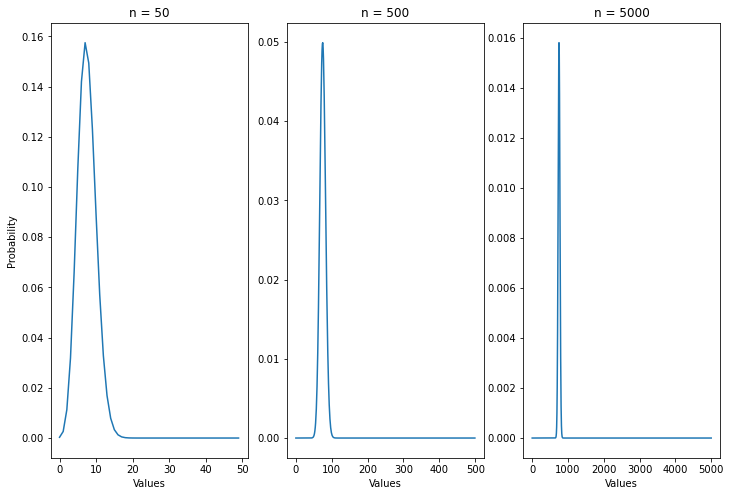

In [13]:
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize = (12, 8))

# Variables
sample_size = [50, 500, 5000]

# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines
for i in range(3):
    x = range(sample_size[i])
    dist = stats.binom(sample_size[i], p)
    axes[i].set_title('n = ' + str(sample_size[i]))
    axes[i].plot(x, dist.pmf(x))
    axes[i].set_xlabel('Values')
    
axes[0].set_ylabel('Probability');

#### What did you notice from the distribution plots?

In [14]:
# Your answer here

`Comments:`
As the sample size increases, we see that the distribution changes. This is because the shape of the binomial distribution depends on the size of the group of people that clicked or not the YouTube ad.  

#  Challenge 3 - Poisson distribution

- The Poisson distribution is a discrete distribution function expressing probability of a given number of events occurring over a fixed interval of time or space.

- Using poisson distribution, solve the challenge below
- A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?
```python
scipy.stats.poisson.pmf()
```

In [15]:
# Your code here

In [16]:
# Variables
mu = 300
visits = 320

# Probability
stats.poisson.pmf(visits, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [17]:
# Your code here

In [18]:
# Variables
visits = 60

# Probability
stats.poisson.pmf(visits, mu)

2.622743762294515e-64

#### Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [19]:
# Your code here

In [20]:
mu = 300

visits = range(1000)

arr = [stats.poisson.pmf(visit, mu) for visit in visits]

#### Plot the probabilities.
- Your output should look like the figure below:
![poisson distribution](images/ch-3.png)

In [ ]:
# Your code here

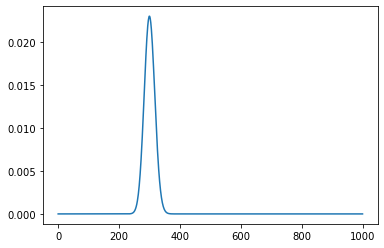

In [21]:
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem
- In this challenge we will work with the central limit theorem
- A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.
- What is the probability that the mean delivery time today is between 30 and 35 minutes?
```python
stats.norm.cdf()
```

In [22]:
# Your code here

In [23]:
# Variables
mu = 35;
stdev = 8;
n_samples = 200;
sigma = stdev / np.sqrt(n_samples)

# Probability
p_3035 = stats.norm.cdf(35, mu, sigma) - stats.norm.cdf(30, mu, sigma)
p_3035

0.5

#### What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [24]:
# Your code here

In [25]:
# your code here

# Variables
time = 115 * 60
time_x_package = time / n_samples

# Probability
1  - stats.norm.cdf(time_x_package, mu, sigma)

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.
- Find the probability that the monthly sales are more than 300.
```python
stats.norm.cdf()
```


In [26]:
# Your code here

In [27]:
# Variables
mu = 200
sigma = 40

# Probability
1 - stats.norm.cdf(300,200,40)

0.006209665325776159

#### Find the probability that the monthly sales fall between 160 and 240.

In [28]:
# Your code here

In [29]:
# Probability
stats.norm.cdf(240,200,40) - stats.norm.cdf(160,200,40)

0.6826894921370859

#### Find the probability that the monthly sales do not exceed 150.

In [30]:
# Your code here

In [31]:
# Probability
stats.norm.cdf(150,200,40)

0.10564977366685535

#### Find the probability that the monthly sales exceed 3000.

In [32]:
# Your code here

In [33]:
# Probability
1 - stats.norm.cdf(3000,200,40)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.
- Find the probability that in a particular month there is no violent robbery.
```python
stats.norm.cdf()
```

In [34]:
# Your code here

In [35]:
# Variables
mu = 4

# Probability
stats.poisson.cdf(0,mu)

0.018315638888734182

#### Find the probability that there are at least 1 robbery in a given month.

In [36]:
# Your code here

In [37]:
# Probability
stats.poisson.cdf(1,mu)

0.0915781944436709

#### Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [38]:
# Your code here

In [39]:
# Probability
stats.poisson.cdf(6,mu) - stats.poisson.cdf(2,4)

0.6512227160438819

#### Find the probability that there are more than 2 robberies in 15 days.

In [40]:
# Your code here

In [41]:
# Probability
1 - stats.poisson.cdf(2,mu/2)

0.3233235838169366